In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np

We create *k* actions with unit expected rewards. These expected rewards are used to create normal
 random distributions with unit variance. When an action is selected we return a reward based on the distribution for that action. 

In [3]:
k = 10
expected_rewards = np.random.normal(0, 1, size=k)

print(expected_rewards)

def action(a):
    return random.normalvariate(expected_rewards[a], 1)

[ 0.2881515   0.4285383   0.07216206  0.56531344 -1.51346267  0.14129736
 -0.54324608 -0.31331411  0.97177903  1.36552467]


We'll now create the functionality to update value estimates. We use a sample average method where we simply average all of the rewards obtained from the selected action so far.

In [4]:
estimates = [0] * k
times_selected = [0] * k

def sample_average_estimate(a, r):
    times_selected[a] += 1
    estimates[a] = estimates[a] + (r - estimates[a]) / times_selected[a]
    

Let's try a simple greedy action selection method. 

In [5]:
def greedy_select():
    # Select the indicies of all the apparent optimal actions
    max_actions = [action for action, value in enumerate(estimates) if value == max(estimates)]
    # Return a random choice from them
    return random.choice(max_actions)

In [6]:
for t in range(1000):
    a = greedy_select()
    r = action(a)
    sample_average_estimate(a, r)

print(estimates)

[0, 0, 0, 0.5754057792716268, -3.2636631133521714, 0, 0, 0, 0, 0]


We can see that several estimates are not updating because we are not exploring at all. 

To fix this, let's try a slightly more sophisticated action selection method which randomly selects actions with some probability.

In [7]:
def epsilon_greedy_select(epsilon):
    if random.random() < epsilon:
        return random.choice(range(k))
    return greedy_select()

estimates = [0] * k
times_selected = [0] * k

for t in range(1000):
    a = epsilon_greedy_select(0.10)
    r = action(a)
    sample_average_estimate(a, r)

print(estimates)

[0.0436758519897308, 0.2836289962571977, 0.23239913209574545, 0.3320602122004192, -1.9814028525140204, 0.6233188089113466, -0.7905668557536087, -1.4070080244496452, 0.8874090766022114, 1.4378270052721096]


To compare the two methods, we can create a testbed. Here, we compare the greedy method with two epsilon methods with epsilon-values of 0.01 and 0.1. We run each method a certain number of times to a certain number of timesteps. Each run, we create a new set of actions.

In [8]:
runs = 1000
steps = 1000

rewards_greedy = []
rewards_e_greedy = []
rewards_e_greedy2 = []

for run in range(runs):
    row = []
    expected_rewards = [random.normalvariate(0, 1) for _ in range(k)]
    estimates = [0] * k
    times_selected = [0] * k
    for t in range(steps):
        a = greedy_select()
        r = action(a)
        sample_average_estimate(a, r)
        row.append(r)
    rewards_greedy.append(row)

for run in range(runs):
    row = []
    expected_rewards = [random.normalvariate(0, 1) for _ in range(k)]
    estimates = [0] * k
    times_selected = [0] * k
    for t in range(steps):
        a = epsilon_greedy_select(0.01)
        r = action(a)
        sample_average_estimate(a, r)
        row.append(r)
    rewards_e_greedy.append(row)

for run in range(runs):
    row = []
    expected_rewards = [random.normalvariate(0, 1) for _ in range(k)]
    estimates = [0] * k
    times_selected = [0] * k
    for t in range(steps):
        a = epsilon_greedy_select(0.1)
        r = action(a)
        sample_average_estimate(a, r)
        row.append(r)
    rewards_e_greedy2.append(row)

rewards_greedy_average = np.mean(rewards_greedy, axis=0)
rewards_e_greedy_average = np.mean(rewards_e_greedy, axis=0)
rewards_e_greedy2_average = np.mean(rewards_e_greedy2, axis=0)

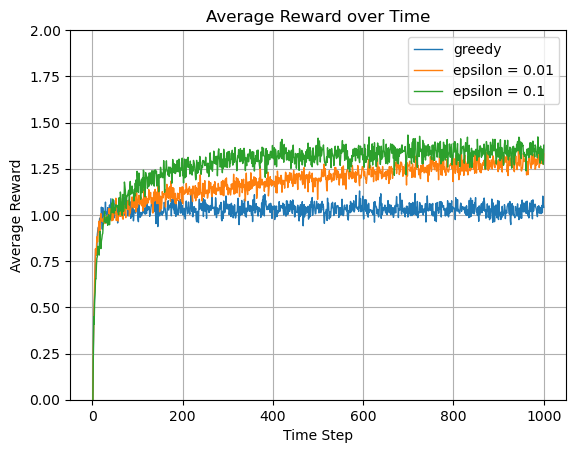

In [9]:
plt.plot(range(1, len(rewards_greedy_average) + 1), rewards_greedy_average, label="greedy", linewidth=1)
plt.plot(range(1, len(rewards_e_greedy_average) + 1), rewards_e_greedy_average, label="epsilon = 0.01", linewidth=1)
plt.plot(range(1, len(rewards_e_greedy2_average) + 1), rewards_e_greedy2_average, label="epsilon = 0.1", linewidth=1)
plt.xlabel('Time Step')
plt.ylabel('Average Reward')
plt.title('Average Reward over Time')
plt.legend()
plt.grid(True)
plt.ylim(0, 2)
plt.show()

We now experiment with nonstationary problems, where the expected values go on random walks. 

In [17]:
def update_rewards(qs):
    for i in range(len(qs)):
        qs[i] += random.normalvariate(0, 0.01)
    return qs

runs = 500
steps = 10000

rewards_e_greedy = []

for run in range(runs):
    row = []
    expected_rewards = [random.normalvariate(0, 1) for _ in range(k)]
    estimates = [0] * k
    times_selected = [0] * k
    for t in range(steps):
        expected_rewards = update_rewards(expected_rewards)
        a = epsilon_greedy_select(0.1)
        r = action(a)
        sample_average_estimate(a, r)
        row.append(r)
    rewards_e_greedy.append(row)

rewards_e_greedy_average = np.mean(rewards_e_greedy, axis=0)

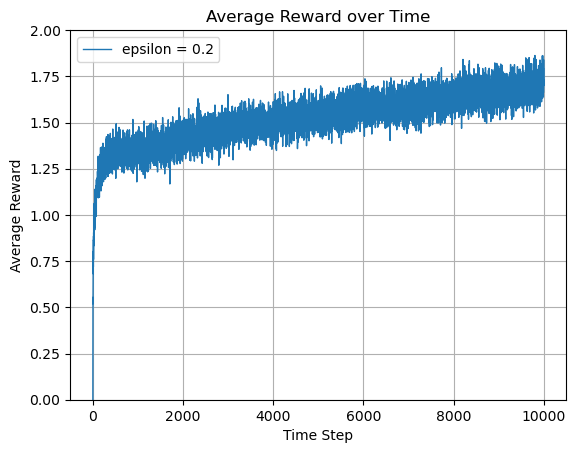

In [19]:
plt.plot(range(1, steps + 1), rewards_e_greedy_average, label="epsilon = 0.1", linewidth=1)
plt.xlabel('Time Step')
plt.ylabel('Average Reward')
plt.title('Average Reward over Time')
plt.legend()
plt.grid(True)
plt.ylim(0, 2)
plt.show()